In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\Aathira\Desktop\DBSCAN\wine_clustering_data.csv')

In [4]:
print("Dataset preview:")
print(df.head())

Dataset preview:
   alcohol  malic_acid   ash  ash_alcanity  magnesium  total_phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280  proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     11

In [5]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
data = df[numeric_cols]

In [6]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [12]:
from sklearn.neighbors import NearestNeighbors
k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

In [13]:
k_distances = np.sort(distances[:, k-1])

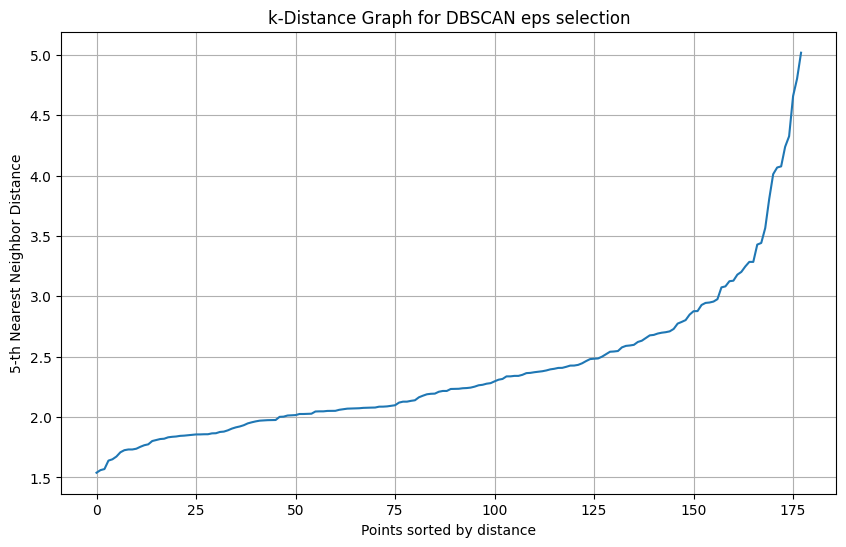

In [14]:
plt.figure(figsize=(10,6))
plt.plot(k_distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}-th Nearest Neighbor Distance")
plt.title("k-Distance Graph for DBSCAN eps selection")
plt.grid(True)
plt.show()

In [8]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
df['Cluster'] = dbscan_labels

In [9]:
print("\nCluster labels for each row:")
print(df['Cluster'].value_counts())


Cluster labels for each row:
Cluster
-1    178
Name: count, dtype: int64


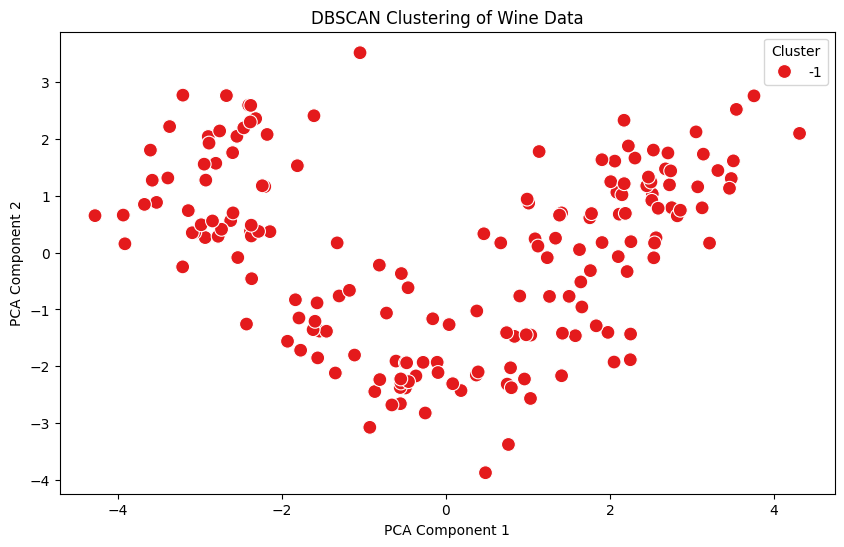

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=dbscan_labels, palette='Set1', s=100)
plt.title("DBSCAN Clustering of Wine Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()